In [131]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

prices = pd.read_csv('bvp_historical_prices_2020.csv')
fundamentals = pd.read_csv('bvp_emcloud_fundamentals.csv')
fundamentals['YTD %'] = fundamentals['Symbol'].apply(lambda x: (prices[x].iloc[-1]/prices[x].iloc[0]-1)*100)

KeyError: 'BILL'

In [127]:
prices.head()

,Date,ADBE,APPF,AVLR,BL,BOX,COUP,CRM,CRWD,DBX,...,WDAY,WORK,ZEN,ZM,ZS,ZUO,OKTA,WIX,WK,YEXT
0,2/1/2020,334.429993,113.489998,78.050003,52.590000,17.240000,153.570007,166.990005,49.439999,18.090000,...,167.460007,23.020000,79.989998,68.720001,47.330002,14.76,117.31,127.55,43.36,14.64
1,3/1/2020,331.809998,112.269997,78.860001,52.810001,16.940001,159.580002,166.169998,50.750000,18.000000,...,168.440002,22.459999,78.349998,67.279999,47.380001,14.77,118.29,128.92,43.20,14.25
2,6/1/2020,333.709992,112.970001,80.070000,53.669998,17.320000,164.759995,173.449997,55.110001,18.530001,...,169.490005,23.520000,80.930000,70.320000,48.700001,14.67,123.43,131.63,43.45,14.77
3,7/1/2020,333.390015,114.169998,82.510002,53.470001,16.969999,165.759995,176.000000,54.750000,18.530001,...,172.949997,23.830000,78.680000,71.900002,48.400002,14.69,122.89,130.01,43.81,14.71
4,8/1/2020,337.869995,115.300003,82.139999,55.049999,16.860001,167.460007,177.330002,55.660000,18.459999,...,178.710007,23.770000,79.800003,72.550003,50.750000,14.66,125.55,133.78,44.09,14.77


In [128]:
fundamentals.head()

,Company,Symbol,Price,Market Cap,EV / Annualized Revenue,EV / Forward Revenue,Efficiency,Revenue Growth Rate,Gross Margin,LTM FCF Margin,YTD %
0,"2U, Inc.",TWOU,37.80,2434.459904,3.537270,3.007609,0.3210,0.3486,0.6905,-0.0277,60.645976
1,Adobe Systems Incorporated,ADBE,447.60,214698.049536,17.187024,14.984489,0.4943,0.1399,0.8673,0.3544,33.839672
2,"Anaplan, Inc.",PLAN,46.46,6390.108160,14.779234,12.269163,0.3245,0.3694,0.7618,-0.0449,-13.611008
3,"AppFolio, Inc.",APPF,160.96,5520.380928,17.210602,14.086656,0.3802,0.2738,0.6618,0.1064,41.827482
4,Atlassian Corporation Plc,TEAM,162.69,39928.520704,22.606557,19.129215,0.5993,0.2866,0.8371,0.3127,32.397466


In [129]:
fundamentals.head()

,Company,Symbol,Price,Market Cap,EV / Annualized Revenue,EV / Forward Revenue,Efficiency,Revenue Growth Rate,Gross Margin,LTM FCF Margin,YTD %
0,"2U, Inc.",TWOU,37.80,2434.459904,3.537270,3.007609,0.3210,0.3486,0.6905,-0.0277,60.645976
1,Adobe Systems Incorporated,ADBE,447.60,214698.049536,17.187024,14.984489,0.4943,0.1399,0.8673,0.3544,33.839672
2,"Anaplan, Inc.",PLAN,46.46,6390.108160,14.779234,12.269163,0.3245,0.3694,0.7618,-0.0449,-13.611008
3,"AppFolio, Inc.",APPF,160.96,5520.380928,17.210602,14.086656,0.3802,0.2738,0.6618,0.1064,41.827482
4,Atlassian Corporation Plc,TEAM,162.69,39928.520704,22.606557,19.129215,0.5993,0.2866,0.8371,0.3127,32.397466


<IPython.core.display.Javascript object>


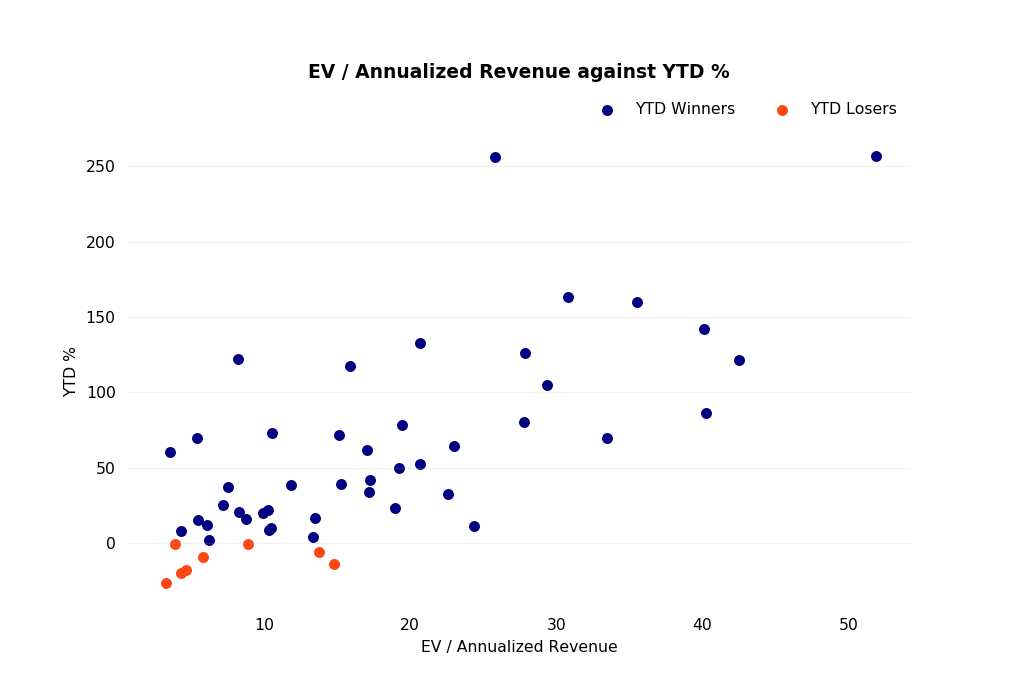

In [130]:
%matplotlib notebook
orange = (255,71,19)
yellow = (255,206,0)
green = (0,139,92)
dark_blue = (0,104,150)
turq = (0,144,158)
brightblue = (137,219,236)
navy = (0,0,128)
def color_converter(color):
    return tuple(map(lambda x: x/255, color))

stat_x = 'EV / Annualized Revenue'
stat_y = 'YTD %'

gains = fundamentals[fundamentals[stat_y] >= 0]
losses = fundamentals[fundamentals[stat_y] < 0]

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sc_gain = plt.scatter(gains[stat_x], gains[stat_y], c=color_converter(navy), label='YTD Winners')
sc_gain.label = 'gain'
sc_loss = plt.scatter(losses[stat_x], losses[stat_y], c=color_converter(orange), label='YTD Losers')
sc_loss.label = 'loss'
ymin, ymax = plt.ylim()
ax.set_ylim(ymin, ymax)
plt.title('{} against {}'.format(stat_x, stat_y), fontweight='bold', y=1.1)
remove_spines = ['right', 'top', 'bottom', 'left']
for spine in remove_spines:
    ax.spines[spine].set_visible(False)
plt.grid(which='major',axis='y', alpha=0.2)
plt.tick_params(bottom=False, labelbottom=True, left=False)
plt.xlabel(stat_x)
plt.ylabel(stat_y)
plt.legend(loc=0, frameon=False, ncol=2, bbox_to_anchor=(1,1.1))
plt.subplots_adjust(bottom=0.1, top=0.8)

annot = ax.annotate("", xy=(0,0), xytext=(-5,10),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"))
annot.set_visible(False)

def update_annot(ind, sc):
    if sc.label == 'gain':
        data = gains
    elif sc.label == 'loss':
        data = losses
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    idx = ind["ind"][0]
    text = "{} ({}) \n{}: {:.2f} \n{}: {:.2f}%".format(data['Company'].iloc[idx], data['Symbol'].iloc[idx], stat_x, data[stat_x].iloc[idx], stat_y, data[stat_y].iloc[idx])
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(color_converter(yellow))
    annot.get_bbox_patch().set_alpha(0.8)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont_gain, ind_gain = sc_gain.contains(event)
        cont_loss, ind_loss = sc_loss.contains(event)
        
        if cont_gain:
            update_annot(ind_gain, sc_gain)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        elif cont_loss:
            update_annot(ind_loss, sc_loss)
            annot.set_visible(True)
            fig.canvas.draw_idle()            
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [46]:
fundamentals

,Company,Symbol,Price,Market Cap,EV / Annualized Revenue,EV / Forward Revenue,Efficiency,Revenue Growth Rate,Gross Margin,LTM FCF Margin,YTD %
0,"2U, Inc.",TWOU,48.535,3125.833472,4.483385,3.812056,0.3210,0.3486,0.6905,-0.0277,83.382917
1,Adobe Systems Incorporated,ADBE,449.510,215614.210048,17.260247,15.056438,0.4943,0.1399,0.8673,0.3544,35.920823
2,"Anaplan, Inc.",PLAN,45.380,6255.497216,14.455167,12.000134,0.3245,0.3694,0.7618,-0.0449,-16.325770
3,"AppFolio, Inc.",APPF,162.920,5587.601920,17.409791,14.719067,0.3802,0.2738,0.6618,0.1064,47.131905
4,Atlassian Corporation Plc,TEAM,180.500,44299.575296,25.145064,21.277248,0.5993,0.2866,0.8371,0.3127,43.497726
5,"Avalara, Inc.",AVLR,133.440,10464.672768,22.621380,19.007998,0.3090,0.3116,0.6926,-0.0025,60.666235
6,"BlackLine, Inc.",BL,92.800,5232.676864,15.202872,13.185134,0.3804,0.2880,0.8055,0.0924,74.557906
7,Box,BOX,18.400,2823.535104,4.121180,3.754635,0.2296,0.1263,0.7058,0.1033,2.494201
8,"Cloudflare, Inc.",NET,42.490,12902.428672,33.867476,26.062340,0.2340,0.4783,0.7718,-0.2443,137.404572
9,Coupa Software Incorporated,COUP,315.940,21191.327744,44.464052,37.085911,0.5743,0.4656,0.6407,0.1087,100.800925


Would be interesting to see if there's value in the stocks with low EV/Forward Revenue. Cite Two Sigma paper to find out more about how to gauge efficiency